# Mauna Loa $\text{CO}_2$ Levels

In this project we handle data from the Mauna Loa Observatory in order to see how linear and quadratic regression work on actual data. This data is from March 1958 through April 1974 and has been obtained by C. David Keeling of the Scripps Institution of Oceanography (SIO) and was obtained from the  from the Scripps website (scrippsco2.ucsd.edu).

# Loading and Plotting $\text{CO}_2$ levels

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = loadtxt ("co2_mm_mlo.txt",skiprows = 72)# loading the text file 

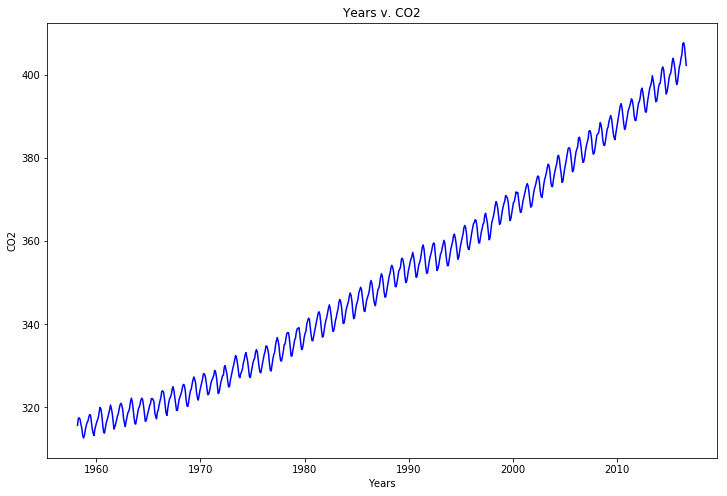

In [3]:
figure(figsize=(12,8))
years = data[:,2]
co2 = data[:,4]
plot(years, co2,"b")
title ("Years v. CO2")
xlabel('Years')
ylabel('CO2');
#legend()

### Observation 

By plotting our data we can make some obvious observations 

- The amount of $\text{CO}_2$ in the atmosphere has increased in the past few years 
- The amount of $\text{CO}_2$ seems to oscillate or have some periodic behavior over time 

With these observations one might guess that the explanation for periodic behavior to the $\text{CO}_2$ level is that there are seasons where deciduous trees are dormant (loose thier leaves) and don't take in any $\text{CO}_2$ and of course seasons where the deciduous do take in $\text{CO}_2$.




***Linear Regression***
------------------

### What is Linear Regression? 

A Regression is an attempt to find a function $f(x)$ that relates two 'random variables' in this case the two random variables are year or time passed and $\text{CO}_2$ levels. A linear regression is where we assume that the function is of the linear form 

$$f(x) = w_0 + w_1 x$$

# Deriving the Polynomial Regression Model in 1-dim

When plotting the data we can see that it can be describes as a set of points $$\{(x_1,y_1),(x_2,y_2),(x_3,y_3),\dots,(x_i,y_i)\}$$

When creating our model with our given data we want to be able to chose a function $f(x)$ so that the average distance between the data points  and the function is minimized. We describe the distance of between the data points $(x_i,y_i)$ and the points of our function $(x_i,f(x_i))$ as


$$\text{distance}^2 = (y_i - f(x_i))^2 + (x_i - x_i)^2$$


$$\text{distance}^2 = (y_i - f(x_i))^2$$

We obtain our average distance is 

$$\overline{{distance}}^2 = \frac{1}{n}\sum_{i = 1}^{n}(y_i - f(x_i))^2$$

This is also known as the $\textbf{Mean Squared Error}$

### Minimizing The Distance/Error

We are assuming That our function $f(x)$ is linear so our mean squareed error becomes 
$$\frac{1}{n}\sum_{i = 1}^{n}(y_i - f(x_i))^2 = \frac{1}{n}\sum_{i = 1}^{n}(y_i - w_0 - w_1x_i)$$

then minimizing with repect to the coefficients $w_0$ and $w_1$


$$\frac{1}{n}\frac{\partial}{\partial w_0}\sum_{i = 1}^{n}((y_i)^2 -2y_if(x_i)+ f(x_i)^2) = 0$$
this  yields

$$\frac{1}{n}\sum_{i = 1}^{n}((-2y_i+ 2f(x_i)) = 0 $$
$$\frac{1}{n}\sum_{i = 1}^{n} f(x_i) = \frac{1}{n}\sum_{i = 1}^{n}y_i $$
$$\frac{1}{n}\sum_{i = 1}^{n} w_0 + w_1 x_i  = \frac{1}{n}\sum_{i = 1}^{n}y_i $$
This creates the equation 
$$w_0 + w_1 \overline{x} = \overline{y}$$


Continuing on


$$\frac{1}{n}\frac{\partial}{\partial w_1}\sum_{i = 1}^{n}((y_i)^2 -2y_if(x_i)+ f(x_i)^2)=0$$


$$\frac{1}{n}\sum_{i = 1}^{n}(w_0y_i + w_1x_{i}^{2})=\frac{1}{n}\sum_{i = 1}^{n} y_ix_i$$


This produces
$$w_0\overline{y} + w_1\overline{x^2} = \overline{xy}$$

So now we are left with at System of equations 

$$w_0 + w_1 \overline{x} = \overline{y}$$
$$w_0\overline{x} + w_1\overline{x^2} = \overline{xy}$$

We can then place this in matrix form

$$\begin{pmatrix}1&\overline{x}\\
                \overline{x}&\overline{x^2}
\end{pmatrix}\begin{pmatrix}w_0 \\ w_1\end{pmatrix} = \begin{pmatrix}\overline{y} \\ \overline{xy}\end{pmatrix}$$

Then by finding the inverse of the matrix we can solve for $w_0$ and $w_1$


$$\begin{pmatrix}w_0 \\ w_1\end{pmatrix} = \frac{1}{\overline{x^2}-\overline{x}^2}\begin{pmatrix}\overline{x^2}&-\overline{x}\\
                -\overline{x}&1
\end{pmatrix}\begin{pmatrix}\overline{y} \\ \overline{xy}\end{pmatrix}$$



### NOTE:
In this particular case we are deriving a linear regression for a 2-dimensional model. <br/> 
One can use similar tactics to solve for higher dimensional models.

In [ ]:
### Correlation Coefficent 

### Implementing our Linear Model

For code simplification let $y = f(x) = \text{CO}_2$  and $x = years$. This implies that our linear regression model  

$$y = w_0 + w_1 x$$

will be interpreted as 

$$\text{CO}_2 = w_0 + w_1 (years)$$

In [4]:
xbar = mean (years)# average number of years (first moment)
ybar = mean (co2)# average number of years (first moment)
x2bar = mean(years**2) # average of the square number of years (second moment)
xybar = mean(years * co2)

In [5]:
A = array([[1,xbar],[xbar, x2bar]])
b = array([ybar, xybar])

In [6]:
w0,w1 = linalg.solve(A,b)# using numpy's builtin linear algebra solver to find the solution 
linreg = w0 + w1*years

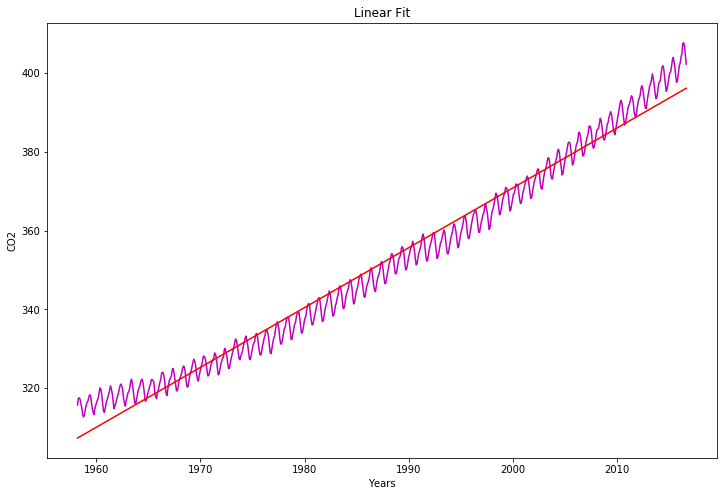

In [7]:
figure(figsize=(12,8))
years = data[:,2]
co2 = data[:,4]
plot(years, co2,"m")
plot (years, linreg, "r")
title("Linear Fit")
xlabel('Years')
ylabel('CO2');
#legend()

### Observation 

Now that we have plotted both plotting our data Linear regression model we can make some observations 

- It seems as though are model is good at predicting the overall upward trend of the data 
- Although the linear models seems to ignore the slight curvature in the model 
- Personally I feel as though the model will be accurate in its inference but not very precise
- We can check if a higher order ploynomial model will be a better fit

**Linear Prediction**

Using our model we attempt to make predictions about the CO_2 levels in the next few years. In particular we make a prediction for the year 2050. 

In [8]:
linreg2050 = w0 + w1*2050
linreg2100 = w0 + w1*2100

In [9]:
print (linreg2050,"micromol/mol")
print (linreg2100,"micromol/mol")

446.8752127749176 micromol/mol
522.8926247361683 micromol/mol


**Error Testing**
---------

Now we want to know the accuracy of our model. We can find this by checking the values of the Mean Squared Error and plotting the differnce between the obseved points and the function.

$$Residuals = (y_i - f(x_i))$$

In [30]:
linres = co2 - linreg # difference between our purposed linear functions 

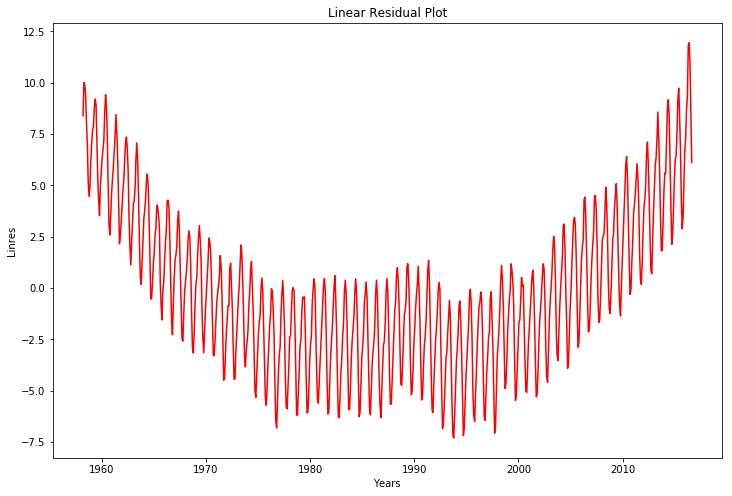

In [31]:
figure(figsize=(12,8))
title("Linear Residual Plot")
plot (years, linres, "r")
xlabel('Years')
ylabel('Linres');

### Observations

Looking at the plot of residuals we can make some observations

- There is is an overall curvature to the graph
- This cruvature seems to be a bit quadratic 

Okay, if we assume that our model holds some error $\epsilon$ we then write each $y_i$ as 

$$y_i = f(x_i) + \epsilon$$

$$y_i - f(x_i) = \epsilon$$

Looking at our residuals plot we can see that $\epsilon$ has some quadratic behavior so we can assume that is $\epsilon$ is of the form 

$$\epsilon = w_2 x^2$$

And just through visual observation of the curvature of the graph  we can intuit that $w_2$ is quite  a large coefficent and it is worth increasing the order of our model in order to get a more accurate function. 

Mean Squared Error of our regression is:

In [32]:
mean(linres**2)

14.941720343729498

The most acurate model should give us a Mean squared Error should be zero. Although this model is releatively close it wouldnt hurt to try a higher order model to gain more acuraccy.

**Quadratic Regression**
--------------------

Now for a quadratic regression (or for any higher order polynomial regression) the derivation is the same as the linear regression; however, this time we assume that our function $f(x)$ is of the form 

$$f(x) = v_0 + v_1 x + v_2 x^2$$

as we did in the linear regression we will minmize the Mean Squared Error for  $v_0$, $v_1$, and $v_2$

### Derivation of a Quadratic Model

Starting with the Mean Squared Error 

$$\frac{1}{n}\sum_{i = 1}^{n}(y_i - f(x_i))^2$$
then minimizing with respect to $v_0$, $v_1$ and $v_2$

$$v_0 + v_1\overline{x}+v_2\overline{x^2} = \overline{y}$$
$$v_0\overline{x} + v_1\overline{x^2}+v_2\overline{x^3} = \overline{xy}$$
$$v_0\overline{x} + v_1\overline{x^3}+v_2\overline{x^4} = \overline{x^2y}$$
we then put this in matrix for 

$$
\begin{pmatrix}
1&\overline{x}&\overline{x^2}\\
\overline{x}&\overline{x^2}&\overline{x^3}\\
\overline{x^2}&\overline{x^3}&\overline{x^4}\\
\end{pmatrix}
\begin{pmatrix}v_0 \\ v_1\\ v_2\end{pmatrix} = 
\begin{pmatrix} \overline{y}\\\overline{xy}\\\overline{x^2y}\end{pmatrix}
$$

In [33]:
xbar = mean (years)# average number of years (first moment)
ybar = mean (co2)# average number of years (first moment)
x2bar = mean(years**2)# average of the square number of years (second moment)
x3bar = mean (years**3)# average of the cubed number of years (third moment)
x4bar = mean (years**4)# average of the quartic number of years (fourth moment)
xybar = mean(years * co2)
x2ybar = mean ((years**2) * co2)

In [34]:
B = array([[1,   xbar, x2bar],
           [xbar,x2bar,x3bar],
           [x2bar,x3bar,x4bar]])
n = array( [ybar,xybar,x2ybar])

In [35]:
v0,v1,v2= linalg.solve(B,n)

In [36]:
quadreg = v0 + (v1*years)+(v2*(years**2))

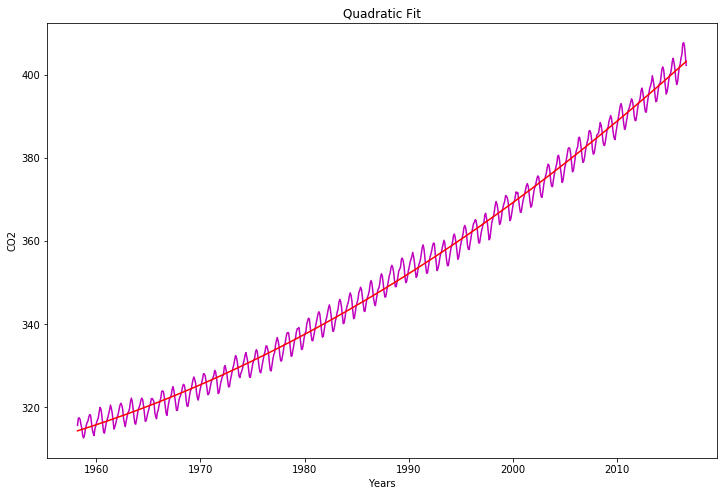

In [37]:
figure(figsize=(12,8))
years = data[:,2]
co2 = data[:,4]
plot(years, co2,"m")
plot (years, quadreg, "r")
title("Quadratic Fit")
xlabel('Years')
ylabel('CO2');
#legend()

### Observations

Now that we have plotted both plotting our data Linear regression model we can make some observations 

- It seems as though are model is good at predicting the overall upward trend of the data 
- This model also seems to fit the curvature of the data 

**Quadratic Prediction**

In [38]:
quadreg2050 = v0 + (v1*2050)+(v2*(2050**2))
quadreg2100 = v0 + (v1*2100)+(v2*(2100**2))

In [39]:
print (quadreg2050,"micromol/mol")

492.08518886635284 micromol/mol


In [40]:
print (quadreg2100,"micromol/mol")

677.1389477784833 micromol/mol


**Quadratic Residual Plot**
-------------------------------

In [41]:
quadres = co2 - quadreg

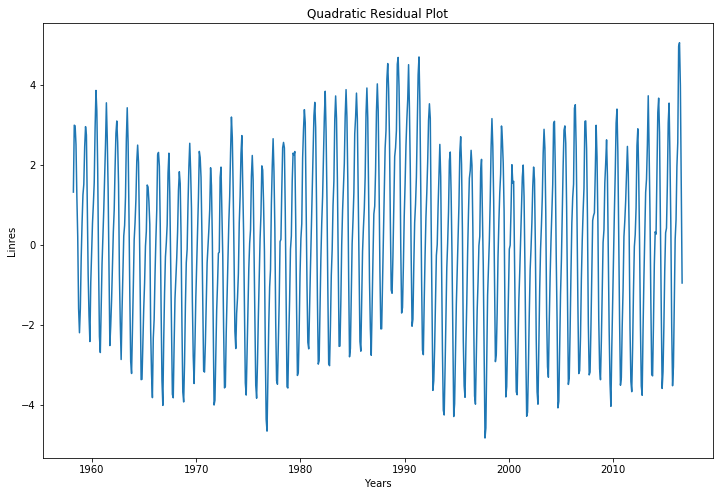

In [42]:
figure(figsize=(12,8))
title("Quadratic Residual Plot")
plot(years, quadres)
xlabel('Years')
ylabel('Linres');

### Observations

Looking at the plot of residuals we can make some observations

- Compared to the linear residuals this graph seems more flat 
- Although looking a bit more closely the graph seems to be a bit quartic 

Again, if we assume that our model holds some error $\epsilon'$ we can then write each $y_i$ as 

$$y_i = f(x_i) + \epsilon$$

$$y_i - f(x_i) = \epsilon$$

Looking at our residuals plot we can see that $\epsilon$ has some quartic behavior so we can assume that is $\epsilon$ is of the form 

$$\epsilon = w_3 x^4$$

And just through visual observation of the curvature of the graph  we can intuit that $w_3$ is quite  a large coefficent and it is worth increasing the order of our model in order to get a more accurate function. 

The mean squared error of our  quadratric model is:

In [43]:
mean(quadres**2)

4.857413010220994

Compared to our linear regression our quadratic regresstion is more accurate. So if we countinued futher with higher order polynomial regressions the next regession should be a quartic model and it's means squared error should be much closer to zero. 